# Chapter8. 경사하강법(Gradient Descent)

- '가장 적합한(Best)' 것을 찾는다. == '모델의 오류(Error)를 최소화 하는' 또는 'Likelihood(우도)'를 최대화 하는 것 
- 최적화 문제에 대한 답을 내리는 하나의 방법

## 8.1 경사하강법에 숨은 의미

In [18]:
def sum_of_squares(vector_package):
    # v에 속해있는 항목들의 제곱합을 계산한다.
    return sum(value ** 2 for value in vector_package)

## 8.2 Gradient 계산하기

In [23]:
# 특정 함수의 순간기울기(?)
def difference_quotient(funtion, input_value , slight_increase):
    return (funtion(input_value+slight_increase) - funtion(input_value)) / slight_increase

# 입력값을 제곱으로 돌려주는 함수 선언
def square(input_value):
    return input_value * input_value

# 제곱에 대한 도함수
def derivative(input_value):
    return 2 * input_value

# 도함수와 비교를 위한 경사하강법
derivative_estimate = lambda x: difference_quotient(square, x, slight_increase=0.00001)


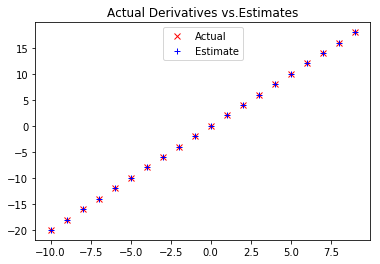

In [24]:
# 필요한 모듈 호출
import matplotlib.pyplot as plt

x = range(-10,10)

plt.title("Actual Derivatives vs.Estimates")
plt.plot(x,list(map(derivative, x)), 'rx', label='Actual')
plt.plot(x,list(map(derivative_estimate,x)), 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [25]:
def partial_difference_quotient(f,v,i,h):
    # 함수 f의 i번째 편도함수가 v에서 가지는 값
    w = [v_j + (h if j ==i else 0)
        for j,v_j in enumerate(v)]
    return (f(w) - f(v)) /h 

def estiamte_gradient(f,v,h=0.00001):
    return [partial_difference_quotient(f,v,i,h) for i, _ in enumerate(v)]

## 8.3 Gradient 적용하기

In [ ]:
# 필요한 모듈 호출
import random,math

def step(vector_package, direction, step_size):
    # v에서 step_size만큼 이동하기
    return [Value + step_size * direction_i for Value, direction_i in zip(vector_package, direction)]

def sum_of_squares_gradient(vector_package):
    return [2 * Value for Value in vector_package]

vector = [random.randint(-10,10) for i in range(3)]

tolerance = 0.0000001

In [1]:
# while True:
#     gradient = sum_of_squares_gradient(vector)
#     print("Vector ::",vector)
#     next_v = step(vector,gradient,-0.01)
#     print("Distance ::",distance(next_v,v))
#     if distance(next_v,v) < tolerance:
#         break
#     vector = next_v
    


In [38]:
def dot(v,w):
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

def vector_subtract(v,w):
    return [v_i - w_i for v_i,w_i in zip(v,w)]

def sum_of_squares(v):
    return dot(v,v)

def squared_distance(v,w):
    return sum_of_squares(vector_subtract(v,w))

def distance(v,w):
    return math.sqrt(squared_distance(v,w))

## 8.4 적절한 이동거리 정하기

In [2]:
def safe(f):
    # f와 똑같은 함수를 반환하지만 f에 오류가 발생하면 무한대를 반환해준다.
    def safe_f(*args, **kwargs):
        try:
            return f(*args,**kwargs)
        except:
            return float('inf')
    return safe_f

## 8.5 종합하기

In [3]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance = 0.000001):
    # 목적함수를 최소화 시키는 theta를 경사 하강법을 사용해서 찾아준다.
    
    step_sizes = [100,10,1,0.1,0.01,0.001,0.0001,0.00001]
    
    theta = theta_0
    target_fn = safe(target_fn)
    value = target_f(theta)
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta,gradient, -step_size)
                      for step_size in step_sizes]
        # 함수를 최소화 시키는 theta 선택
        next_theta = min(next_thetas, key = target_fn)
        next_value = target_fn(next_theta)
        
        #tolerance만큼 수렴하면 멈춤
        if abs(value -next_value) < tolerance:
            return theta
        else:
            theta,value = next_theta,next_value
            
    

In [4]:
def negate(f):
    # x를 입력하면 -f(x)를 반환해주는 함수 생성
    return lambda *args, **kwargs : -f(*args,**kwargs)
def negate_all(f):
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]
def maximize_batch(target_fn, gradient_fn, theta_0, tolerance = 0.000001):
    return minimize_batch(negate(target_fn),negate_all(gradient_fn),theta_0,tolerance)

## 8.6 SGD(Stochastic Gradient Descent)

In [7]:
def in_random_order(data):
    indexes = [i for i, _ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]

def minimize_stochastic(target_fn,gradient_fn,x,y,theta_0,alpha_0 = 0.01):
    
    data = zip(x,y)
    theta = theta_0
    alpha = alpha_0
    min_theta,min_value = None, float("inf")
    iterations_with_no_improvement = 0
    
    # 만약 100번 넘게 반복하는 동안 더 작아지지 않는다면 멈춤
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i,y_i,theta) for x_i,y_i in data)
        
        if value < min_value:
            min_theta,min_value = theta,value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            iterations_with_no_improvement += 1
            alpha *= 0.9
            
        #각 포인트에 대해 경사를 계산
        for x_i,y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i,y_i,theta)
            theta = vector_subtract(theta,scaler_multiply(alpha,gradient_i))
            
    return min_theta

def maximize_stochastic(target_fn,gradient_fn,x,y,theta_0,alpha_0 = 0.01):
    return minimize_stochastic(negate(target_fn),negate_all(gradient_fn),x,y,theta_0,alpha_0)

## 8.7 더 공부해보고 싶다면

-Active Calculus :; https://scholarworks.gvsu.edu/books/15/

## 도움자료

- 앤드류응 머신러닝 강좌 :: https://www.youtube.com/watch?v=F6GSRDoB-Cg (Artificial Intelligence - All in One)
- Gradient descent, how neural networks learn | Chapter 2, deep learning :: https://www.youtube.com/watch?v=IHZwWFHWa-w&t=589s (3blue1brown)
- [딥러닝] 2. 선형회귀와 Gradient Descent :: https://www.youtube.com/watch?v=GmtqOlPYB84&t=4s (모두의 연구소)